In [1]:
from interpac_embedding import FECDenoisingAutoEncoder, FECNetDataset
import pickle
import pandas as pd

cmh = pd.read_csv('./data/cm_header_file.csv')
cm = pd.read_csv('./data/cm.txt', sep='|', names=cmh.columns, quoting=3).set_index('CMTE_ID')

fecdf = pd.read_parquet("./fecpreprocd.parquet")

with open("./meta.pkl", "rb") as rf:
    lbls = pickle.load(rf)
cmdf = pd.DataFrame(lbls['ents'], columns=['CMTE_ID']).join(cm, on='CMTE_ID').fillna('N/A')
cmdf.head()

CMTE_ID                                            CMTE_NM  \
0  C00000000                                                N/A   
1  C00000059                                 HALLMARK CARDS PAC   
2  C00000422  AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...   
3  C00000489               D R I V E POLITICAL FUND CHAPTER 886   
4  C00000547  KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE   

             TRES_NM                  CMTE_ST1   CMTE_ST2      CMTE_CITY  \
0                N/A                       N/A        N/A            N/A   
1          SARAH MOE                2501 MCGEE    MD #500    KANSAS CITY   
2  WALKER, KEVIN MR.  25 MASSACHUSETTS AVE, NW  SUITE 600     WASHINGTON   
3      JERRY SIMS JR               3528 W RENO        N/A  OKLAHOMA CITY   
4    JERRY SLAUGHTER           623 SW 10TH AVE        N/A         TOPEKA   

  CMTE_ST   CMTE_ZIP CMTE_DSGN CMTE_TP CMTE_PTY_AFFILIATION CMTE_FILING_FREQ  \
0     N/A        N/A       N/A     N/A                  N/A              N/A   
1      MO      64108         U       Q                  UNK                M   
2      DC  200017400         B       Q                  N/A                M   
3      OK      73107         U       N                  N/A                Q   
4      KS  666121627         U       Q                  UNK                Q   

  ORG_TP        CONNECTED_ORG_NM CAND_ID  
0    N/A                     N/A     N/A  
1      C                     N/A     N/A  
2      M    DELAWARE MEDICAL PAC     N/A  
3      L                     N/A     N/A  
4      M  KANSAS MEDICAL SOCIETY     N/A

In [2]:
fnds = FECNetDataset(lbls, fecdf)

from pathlib import Path
cdir = Path('./fec-d-ckpt')
latest = sorted((c for c in cdir.glob('*.ckpt')), key=lambda c: c.stat().st_mtime)[-1]
latest

Column types:
{'conts': ['amt_scaled', 'time_abs_scaled'], 'cats': ['ENTITY_TP', 'TRANSACTION_TP'], 'bins': ['amt_positive'], 'ents': ['CMTE_ID', 'OTHER_ID']}


PosixPath('fec-d-ckpt/epoch=149-step=6899.ckpt')

In [3]:
model = FECDenoisingAutoEncoder.load_from_checkpoint(
    str(latest),
    n_entities=len(lbls["ents"]),
    n_etypes=len(lbls["etype"]),
    n_txtypes=len(lbls["txtype"]),
    n_conts=len(fnds.contcols),
    n_bins=len(fnds.bincols),
    max_epochs=0,
)

In [4]:
rawe = model.entity_embedding.weight.detach().cpu().numpy()

In [5]:
from umap import UMAP
import numpy as np

In [6]:
import matplotlib.pyplot as plt

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
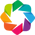

In [7]:
import holoviews as hv
hv.extension('bokeh')

In [8]:
dmap = UMAP(verbose=True, min_dist=0.01, n_neighbors=30)
dmap.fit(rawe);

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.01, n_neighbors=30,
     verbose=True)
Construct fuzzy simplicial set
Wed Aug 25 00:11:47 2021 Finding Nearest Neighbors
Wed Aug 25 00:11:47 2021 Building RP forest with 10 trees
Wed Aug 25 00:11:47 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	Stopping threshold met -- exiting after 6 iterations
Wed Aug 25 00:11:52 2021 Finished Nearest Neighbor Search
Wed Aug 25 00:11:54 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Aug 25 00:11:59 2021 Finished embedding


In [9]:
w=450
h=w
df = cmdf.assign(x=dmap.embedding_[:,0], y=dmap.embedding_[:,1])
#df = df[df['CMTE_TP'] != 'N/A']
(
    hv.Points(df, kdims=['x', 'y']).opts(width=w, height=h, color='CMTE_TP', cmap='Category20').opts(tools=['hover']) +
    hv.Points(df, kdims=['x', 'y']).opts(width=w, height=h, color='CMTE_DSGN', cmap='Category20') +
    hv.Points(df, kdims=['x', 'y']).opts(width=w, height=h, color='CMTE_PTY_AFFILIATION', cmap='Category20')

).cols(2)

:Layout
   .Points.I   :Points   [x,y]   (CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID)
   .Points.II  :Points   [x,y]   (CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID)
   .Points.III :Points   [x,y]   (CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID)